In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the dataset from the provided URL
df = pd.read_csv('https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/heart_disease.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
print(df.isna().sum())

print('...................')

print(f'Duplicate Value: {df.duplicated().sum()}')

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
...................
Duplicate Value: 18078


In [6]:
# Dropping duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [8]:
df = df[df.columns].replace(
    {
        'Yes': 1,
        'No': 0,
        'Male': 1,
        'Female': 0,
        'Yes (during pregnancy)': 1,
        'No, borderline diabetes': 0

        }

    )

In [9]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


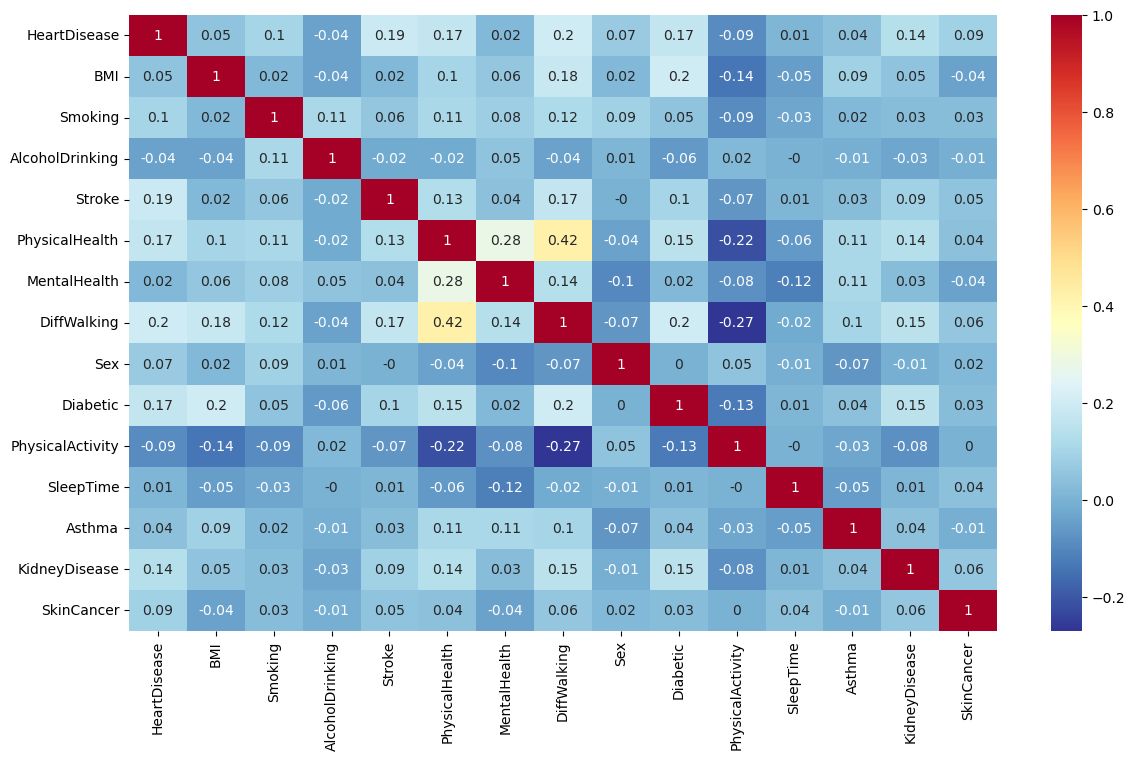

In [10]:
# Correlation Matrix
new_df = df.drop(columns=['AgeCategory', 'Race', 'GenHealth'])
corr = new_df.corr().round(2)

plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, cmap='RdYlBu_r')
plt.show()

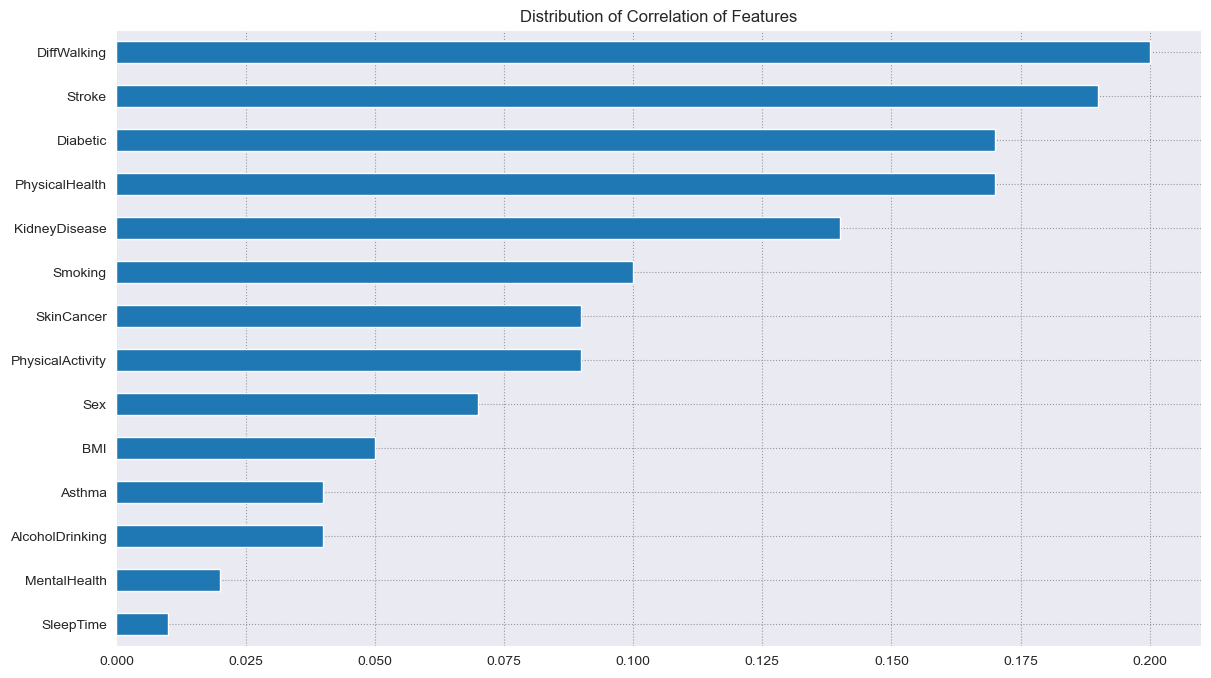

In [11]:
sns.set_style('darkgrid', {'grid.color': '.6', 'grid.linestyle': ':'})
sns.color_palette('magma', as_cmap=True)
plt.figure(figsize=(14,8))
plt.title('Distribution of Correlation of Features')
abs(corr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

In [12]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [13]:
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory          object
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = .25, random_state=42)

print(f'Shape of Train Data: {X_train.shape}\nShape of Test Data: {X_test.shape}\nShape of Training Class: {y_train.shape}\nShape of Testing Class: {y_test.shape}')

Shape of Train Data: (226287, 17)
Shape of Test Data: (75430, 17)
Shape of Training Class: (226287,)
Shape of Testing Class: (75430,)


In [15]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['AgeCategory', 'Race', 'GenHealth']), remainder='passthrough'
    )

# transforming train data
X_train_transformed = transformer.fit_transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names_out())

# transforming train data
X_test_transformed = transformer.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformer.get_feature_names_out())



In [16]:
X_train = pd.concat([X_train_transformed_df, X_train.reset_index(drop=True)], axis = 1)

X_test = pd.concat([X_test_transformed_df, X_test.reset_index(drop=True)], axis = 1)

In [17]:
X_train.drop(['AgeCategory', 'Race', 'GenHealth', 'Sex', 'BMI', 'Asthma', 'AlcoholDrinking','MentalHealth', 'SleepTime', 'PhysicalActivity'], axis=1, inplace=True)

X_test.drop(['AgeCategory', 'Race', 'GenHealth', 'Sex', 'BMI', 'Asthma', 'AlcoholDrinking','MentalHealth', 'SleepTime', 'PhysicalActivity'], axis=1, inplace=True)

In [18]:
X_train.shape

(226287, 45)

In [19]:
# Data Modeling

def model_evaluation(estimator, x_test, y_test):

    from sklearn import metrics

    y_pred = estimator.predict(x_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    #AUC
    y_pred_probability = estimator.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
    auc = metrics.roc_auc_score(y_test, y_pred_probability)
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'kappa': kappa,
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc,
        'cm': cm
        }

In [20]:
#knn without Hyper Parameter Tuning

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

knn_eval = model_evaluation(knn, X_test, y_test)
print('Accuracy: ', knn_eval['accuracy'])
print('Precision: ', knn_eval['precision'])
print('Recall: ', knn_eval['recall'])
print('f1_score', knn_eval['f1'])
print('Cohens Kappa Score: ', knn_eval['kappa'])
print('Area Under Curve: ', knn_eval['auc'])

Accuracy:  0.9054752750894869
Precision:  0.34443387250237867
Recall:  0.053211818315449064
f1_score 0.09218232747644511
Cohens Kappa Score:  0.06972757215203984
Area Under Curve:  0.692016985792224


In [21]:
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[67938,   689],
       [ 6441,   362]], dtype=int64)

HyperParameter Tuning for KNN

In [102]:
# Hyper parameter Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidian', 'manhattan']
    }

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
print(best_param)

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [22]:
#knn after Hyper Parameter Tuning

knn_ht = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 15, weights='uniform')
knn_ht.fit(X_train, y_train)

knn_ht_eval = model_evaluation(knn_ht, X_test, y_test)
print('Accuracy: ', knn_ht_eval['accuracy'])
print('Precision: ', knn_ht_eval['precision'])
print('Recall: ', knn_ht_eval['recall'])
print('f1_score', knn_ht_eval['f1'])
print('Cohens Kappa Score: ', knn_ht_eval['kappa'])
print('Area Under Curve: ', knn_ht_eval['auc'])

Accuracy:  0.9096513323611295
Precision:  0.487551867219917
Recall:  0.03454358371306777
f1_score 0.06451612903225806
Cohens Kappa Score:  0.053216754477356853
Area Under Curve:  0.75033458548129


In [23]:
y_pred = knn_ht.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[68380,   247],
       [ 6568,   235]], dtype=int64)

                                                * Comparing KNN Outputs *

## Output before Hyper Paremeter Tuning

- Accuracy:  0.9054752750894869
- Precision:  0.34443387250237867
- Recall:  0.053211818315449064
- f1_score 0.09218232747644511
- Cohens Kappa Score:  0.06972757215203984
- Area Under Curve:  0.692016985792224


-- Accuracy: 0.9055, the accuracy is approximately 90.55%, indicating that the model correctly classifies around 90.55% of the instances.

-- Precision: 0.3444, the precision is approximately 34.44%, suggesting that only about 34.44% of the instances predicted as positive are actually positive.

-- Recall: 0.0532, indicating that the model captures only about 5.32% of the actual positive instances.


- Confusion Matrix: 
[67938,   689],
[ 6441,   362]

> There are 67,938 true negative predictions (TN).
> There are 362 true positive predictions (TP).
> There are 6441 false negative predictions (FN).
> There are 689 false positive predictions (FP).

In summary, while the model demonstrates relatively high accuracy, it exhibits poor performance in terms of precision, recall, and F1-score, indicating difficulties in correctly identifying positive instances. Cohen's Kappa Score suggests only slight agreement between predicted and true labels, while the AUC indicates moderate discriminative ability of the model. 



## Output after Hyper Paremeter Tuning

- Accuracy:  0.9096513323611295
- Precision:  0.487551867219917
- Recall:  0.03454358371306777
- f1_score 0.06451612903225806
- Cohens Kappa Score:  0.053216754477356853
- Area Under Curve:  0.75033458548129


-- Accuracy: 0.9097, the model achieves an accuracy of approximately 90.97%, suggesting that the majority of predictions are correct.

-- Precision: 0.4876, The precision of around 48.76% indicates that about half of the instances predicted as positive are actually positive.

-- Recall: 0.0345, approximately 3.45% indicates that the model captures only a small fraction of the actual positive instances.


- Confusion Matrix: 
[68380, 247],
[6568, 235]

> There are 68,380 true negative predictions (TN).
> There are 235 true positive predictions (TP).
> There are 6,568 false negative predictions (FN).
> There are 247 false positive predictions (FP).

In brief, although the model shows high accuracy, it performs poorly regarding precision, recall, and F1-score, indicating difficulties in accurately identifying positive instances. Cohen's Kappa Score indicates only slight agreement between predicted and true labels, while the AUC suggests moderate discriminative ability of the model.



We observe, KNN shows satisfactory accuracy, its performance is lacking in other metrics. Therefore, opting for KNN may not be the most prudent decision for this dataset.



In [24]:
# Decision Tree before Hyper Parameter Tuning

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state = 42)
DT.fit(X_train, y_train)
clf_eval = model_evaluation(DT, X_test, y_test)

print('Accuracy: ', clf_eval['accuracy'])
print('Precision: ', clf_eval['precision'])
print('Recall: ', clf_eval['recall'])
print('f1_score', clf_eval['f1'])
print('Cohens Kappa Score: ', clf_eval['kappa'])
print('Area Under Curve: ', clf_eval['auc'])

Accuracy:  0.8541694286093067
Precision:  0.22186878727634196
Recall:  0.24606791121564014
f1_score 0.23334262614998605
Cohens Kappa Score:  0.15300171229973336
Area Under Curve:  0.5814103128321639


In [25]:
y_pred = DT.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[62756,  5871],
       [ 5129,  1674]], dtype=int64)

In [109]:
# Hyper parameter Tuning with GridSearchCV

param_grid = {
    'max_depth': [2, 5, 7, None],
    'min_samples_split': [2, 5, 10, 12],
    'min_samples_leaf': [1, 2, 3, 4]
    }

grid_search = GridSearchCV(DT, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
print(best_param)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [26]:
# DT after hyper parameter Tuning

from sklearn.tree import DecisionTreeClassifier

DT_ht = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 1, min_samples_split= 2)
DT_ht.fit(X_train, y_train)
clf_ht_eval = model_evaluation(DT_ht, X_test, y_test)

print('Accuracy: ', clf_ht_eval['accuracy'])
print('Precision: ', clf_ht_eval['precision'])
print('Recall: ', clf_ht_eval['recall'])
print('f1_score', clf_ht_eval['f1'])
print('Cohens Kappa Score: ', clf_ht_eval['kappa'])
print('Area Under Curve: ', clf_ht_eval['auc'])

Accuracy:  0.9105528304388174
Precision:  0.5838323353293413
Recall:  0.02866382478318389
f1_score 0.054644808743169404
Cohens Kappa Score:  0.04659670104677838
Area Under Curve:  0.7396455734488242


In [27]:
y_pred = DT_ht.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[68488,   139],
       [ 6608,   195]], dtype=int64)

                                                * Comparing Decision Tree Outputs *

## Output before Hyper Paremeter Tuning

- Accuracy:  0.8541694286093067
- Precision:  0.22186878727634196
- Recall:  0.24606791121564014
- f1_score 0.23334262614998605
- Cohens Kappa Score:  0.15300171229973336
- Area Under Curve:  0.5814103128321639


-- Accuracy: 0.8542, the model achieves an accuracy of approximately 85.42%, indicating a relatively high level of overall correctness in predictions.

-- Precision: 0.2219, around 22.19% indicates that only a small fraction of the instances predicted as positive are actually positive.

-- Recall: 0.2461, approximately 24.61% suggests that the model captures only a moderate fraction of the actual positive instances.


- Confusion Matrix: 
[[62756,  5871],
 [ 5129,  1674]]

> There are 62,756 true negative predictions (TN)
> There are 1,674 true positive predictions (TP)
> There 5,129 false negative predictions (FN)
> There are 5,871 false positive predictions (FP)

In summary, while the model achieves a relatively high accuracy, it exhibits weaknesses in precision, recall, and others. The Cohen's Kappa Score indicates slight agreement between predicted and true labels, while the AUC suggests limited ability to distinguish between positive and negative instances. 



## Output after Hyper Paremeter Tuning

- Accuracy:  0.9105528304388174
- Precision:  0.5838323353293413
- Recall:  0.02866382478318389
- f1_score 0.054644808743169404
- Cohens Kappa Score:  0.04659670104677838
- Area Under Curve:  0.7396455734488242


-- Accuracy: 0.9106, the model achieves an accuracy of approximately 91.06%, suggesting a high level of overall correctness in predictions.

-- Precision: 0.5838, around 58.38% indicates that a moderate fraction of the instances predicted as positive are actually positive..

-- Recall: 0.0287, approximately 2.87% suggests that the model captures only a small fraction of the actual positive instances.


- Confusion Matrix: 
[[68488,   139],
 [ 6608,   195]]

> There are 68,488 true negative predictions (TN)
> There are 195 true positive predictions (TP)
> There are 6,608 false negative predictions (FN)
> There are 139 false positive predictions (FP)

To sum up, the model achieves a high accuracy after hyperparameter tuning, but its performance in terms of precision, recall, F1-score, and discriminative ability is limited. The Cohen's Kappa Score indicates slight agreement between predicted and true labels, while the AUC suggests moderate ability to distinguish between positive and negative instances. 



Finally, we observe significant change in Confusion Matrix values in Decision Tree Model (before and after hyper parameter tuning). As the TP decreases and FN increases after tuning hyper parameter so we might choose the model before tuning hyper parameter.

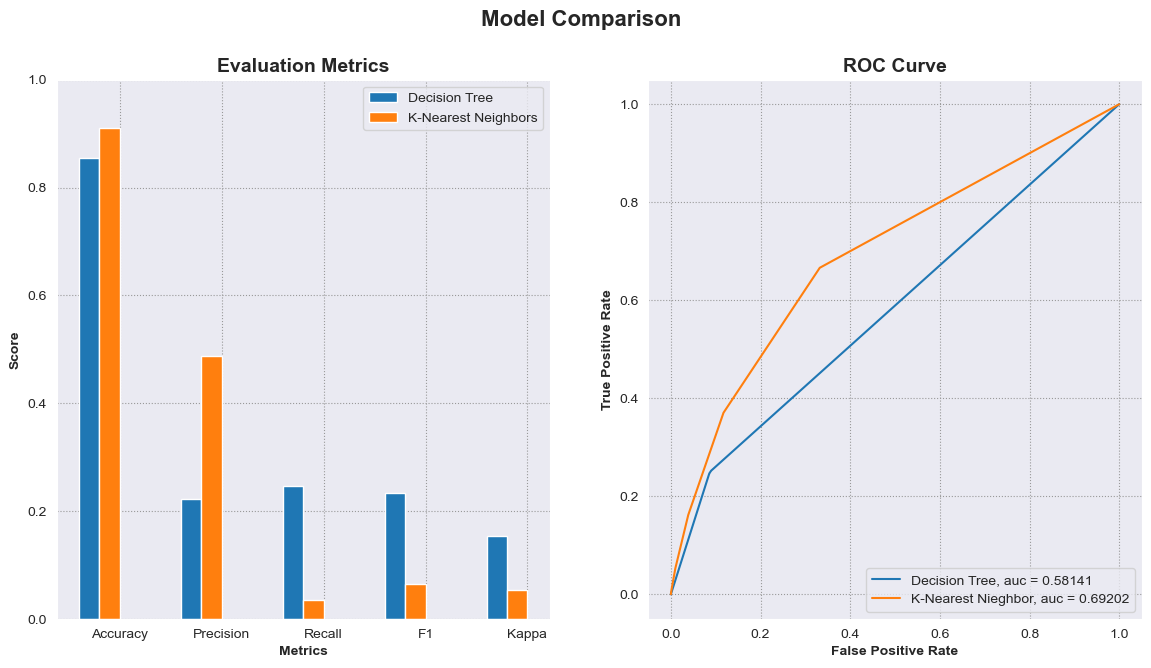

In [28]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['accuracy'], clf_eval['precision'], clf_eval['recall'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_ht_eval['accuracy'], knn_ht_eval['precision'], knn_ht_eval['recall'], knn_ht_eval['f1'], knn_ht_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()